In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
column_names=["user_id","item_id","rating","timestamp"]
dataset=pd.read_csv("ml-100k/ml-100k/u.data",sep='\t',names=column_names)

In [9]:
dataset

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [23]:
movie_titles=pd.read_csv("ml-100k/ml-100k/u.item",sep="\|",header=None,engine='python')

In [36]:
movie_titles=movie_titles.iloc[:,:2]

In [44]:
movie_titles.columns=["item_id","movie_title"]

In [51]:
dataset=dataset.merge(right=movie_titles,on="item_id")

In [57]:
dataset.tail()

,user_id,item_id,rating,timestamp,movie_title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [66]:
ratings=pd.DataFrame(dataset.groupby("movie_title").mean()['rating'])

In [67]:
ratings

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [73]:
movie_item=pd.DataFrame(dataset.groupby('movie_title').count()['item_id'])

In [75]:
ratings=ratings.merge(right=movie_item,on="movie_title")

In [85]:
ratings.columns=['rating','no. of ratings']
ratings

,rating,no. of ratings
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


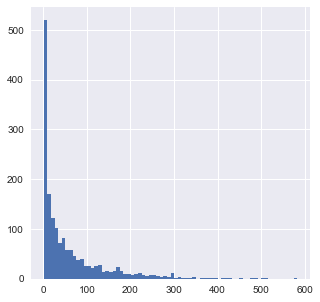

In [87]:
plt.style.use("seaborn")
plt.figure(figsize=(5,5))
plt.hist(x='no. of ratings',data=ratings,bins=70)
plt.show()

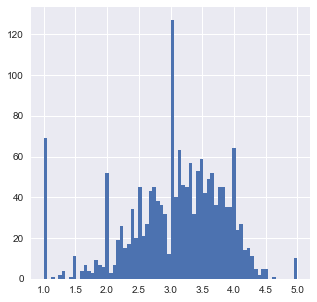

In [89]:
plt.style.use("seaborn")
plt.figure(figsize=(5,5))
plt.hist(x='rating',data=ratings,bins=70)
plt.show()

<Figure size 288x288 with 0 Axes>

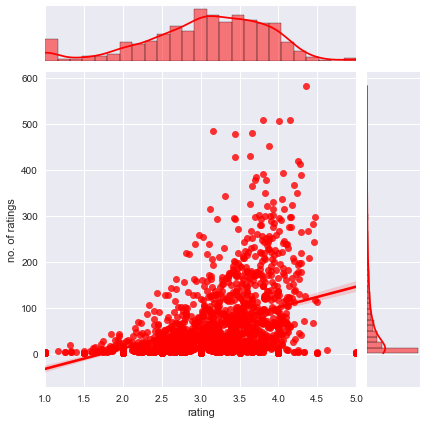

In [97]:
plt.figure(figsize=(4,4))
sns.jointplot(y='no. of ratings',x='rating',data=ratings,color='red',kind='reg')
plt.show()

In [98]:
dataset.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [100]:
data_pivot=dataset.pivot_table(index='user_id',columns='movie_title',values='rating')

In [141]:
starwars_data=data_pivot['Titanic (1997)']

In [142]:
starwars_data.head()

user_id
1    NaN
2    5.0
3    NaN
4    NaN
5    NaN
Name: Titanic (1997), dtype: float64

In [150]:
similar_to_starwars=data_pivot.corrwith(starwars_data)

C:\Users\U372769\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\U372769\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [156]:
import pandas as pd
pd.DataFrame(similar_to_starwars)

,0
movie_title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
...,...
Young Guns II (1990),0.317274
"Young Poisoner's Handbook, The (1995)",0.356783
Zeus and Roxanne (1997),NaN


In [ ]:
corr_starwars=pd.DataFrame(similar_to_starwars)

In [114]:
corr_starwars=corr_starwars.dropna()

In [117]:
corr_starwars=corr_starwars.merge(right=ratings,on="movie_title")

In [123]:
corr_starwars=corr_starwars[corr_starwars['no. of ratings']>100]

In [126]:
corr_starwars.sort_values(by='Correlation',ascending=False)

,Correlation,rating,no. of ratings
movie_title,,,
Star Wars (1977),1.000000,4.358491,583
"Empire Strikes Back, The (1980)",0.747981,4.204360,367
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130
...,...,...,...
"Edge, The (1997)",-0.127167,3.539823,113
As Good As It Gets (1997),-0.130466,4.196429,112
Crash (1996),-0.148507,2.546875,128


In [157]:
def prediction_movies(movie_name):
    movie_data1=data_pivot[movie_name]
    similar_to_movie1=data_pivot.corrwith(movie_data1)
    corr_movie1=pd.DataFrame(similar_to_movie1,columns=["Correlation"])
    corr_movie1=corr_movie1.dropna()
    corr_movie1=corr_movie1.merge(right=ratings,on="movie_title")
    corr_movie1=corr_movie1[corr_movie1['no. of ratings']>100]
    prediction=corr_movie1.sort_values(by='Correlation',ascending=False)
    
    return prediction
    

In [ ]:
pd=prediction_movies('Titanic (1997)')

In [159]:
pd

,Correlation,rating,no. of ratings
movie_title,,,
Titanic (1997),1.000000,4.245714,350
"River Wild, The (1994)",0.497600,3.143836,146
"Abyss, The (1989)",0.472103,3.589404,151
Bram Stoker's Dracula (1992),0.443560,3.158333,120
True Lies (1994),0.435104,3.562500,208
...,...,...,...
Raging Bull (1980),-0.223660,4.120690,116
Jackie Brown (1997),-0.236841,3.642857,126
Brazil (1985),-0.243532,3.817308,208
